# 预测房价：回归问题

In [1]:
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data() 

In [3]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
train_data.shape

(404, 13)

In [5]:
test_data.shape

(102, 13)

In [6]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [7]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [8]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(train_data.shape[1], )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [9]:
for i in range(4):
    print(i)

0
1
2
3


# K折交叉验证

In [10]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
#all_scores = []
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[: i * num_val_samples], 
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[: i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    #val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    #all_scores.append(val_mae)
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
#all_scores

In [13]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) ]

In [14]:
all_mae_histories

[[4.027733170159973,
  3.1097554499560065,
  2.964017650868633,
  2.766251530977759,
  2.6142680951864414,
  2.829821293896968,
  2.1791823264395838,
  2.211357839036696,
  2.4087915609378627,
  2.4809454832926834,
  2.6471564415657873,
  2.1889766513711155,
  2.351593272520764,
  1.9865119811331873,
  2.098731569724508,
  2.1404383064496635,
  2.3172107545456084,
  2.2333053267828307,
  2.0589425870687657,
  2.2460949586169554,
  2.2420460068353334,
  1.9733392507723062,
  1.9930572320919226,
  1.9607348017173238,
  2.490501809828352,
  2.092695406167814,
  2.064463530436601,
  2.55515189218049,
  2.2654510063700157,
  2.0776856582943757,
  1.827825409351009,
  1.9206323529234026,
  2.112956150923625,
  1.87881867248233,
  1.9573566889998937,
  2.1037190692259533,
  2.215304960118662,
  2.0246463152441647,
  2.0898929633716548,
  2.0183776062313874,
  2.2632705291899122,
  2.1649361600970276,
  2.0687034436971836,
  2.130418258138222,
  2.055863370989809,
  2.045950710183323,
  2.1635

In [15]:
len(all_mae_histories)

4

In [16]:
len(all_mae_histories[1])

500

In [17]:
average_mae_history

[4.606492757797241,
 3.518128756249305,
 3.0270341929822866,
 2.820865007910398,
 2.724381979149167,
 2.6930147338621686,
 2.6250218400860774,
 2.580701220153582,
 2.4955397997752273,
 2.544484308450529,
 2.635892719325453,
 2.45728584091262,
 2.5164919890979727,
 2.59596850612376,
 2.380825469989588,
 2.438823096822984,
 2.4929359679174894,
 2.59413477925971,
 2.4034706236112235,
 2.4094603876076124,
 2.4372769405346104,
 2.3243676134855438,
 2.489385987272357,
 2.3173434079283535,
 2.4858783731366145,
 2.4149985301612626,
 2.3410592687011946,
 2.4572086357834317,
 2.4448644501147885,
 2.3750613750797687,
 2.3099730581340223,
 2.390395439497315,
 2.428203090582744,
 2.464407820512753,
 2.2823609143200487,
 2.3255350684175395,
 2.454512048475813,
 2.307088323158793,
 2.3527085037514714,
 2.3438864120162357,
 2.389939052043575,
 2.3037169026856374,
 2.3216254357064123,
 2.2705413976518236,
 2.3130642423535335,
 2.406150761217174,
 2.4291195834037103,
 2.2769017313966655,
 2.375534345607

In [18]:
len(average_mae_history)

500

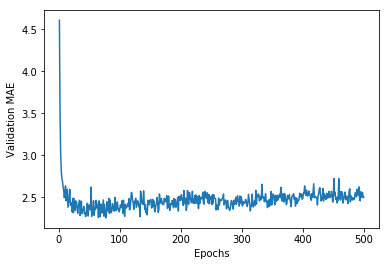

In [20]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [21]:
np.array(all_mae_histories).shape

(4, 500)

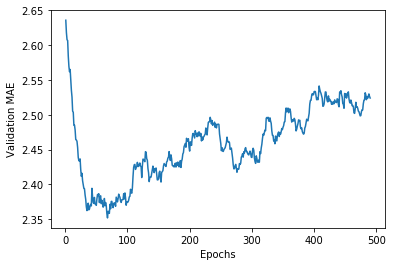

In [22]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        #一个空 list 本身等同于 False
        if smoothed_points:  #列表非空
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: #空列表
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [25]:
model = build_model()
model.fit(train_data, train_targets, 
          epochs=75, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [26]:
test_mae_score

2.52238437241199